<a href="https://colab.research.google.com/github/Yaswantthhh/customer_purchase_prediction/blob/main/Copy_of_ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [ ]:
df = pd.read_csv("customer_purchase_data.csv")

In [ ]:
df

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1


In [ ]:
# checking null values
df.isnull().sum()

,0
Age,0
Gender,0
AnnualIncome,0
NumberOfPurchases,0
ProductCategory,0
TimeSpentOnWebsite,0
LoyaltyProgram,0
DiscountsAvailed,0
PurchaseStatus,0


In [ ]:
# checking duplicacy
df.duplicated().sum()

112

In [ ]:
# dropping duplicates
df.drop_duplicates(inplace = True)

df.duplicated().sum()

0

In [ ]:
# encoding
df_encoded = pd.get_dummies(df, columns=['ProductCategory'], prefix='Product',dtype=int)
df_encoded.head(10)

,Age,Gender,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,Product_0,Product_1,Product_2,Product_3,Product_4
0,40,1,66120.267939,8,30.568601,0,5,1,1,0,0,0,0
1,20,1,23579.773583,4,38.240097,0,5,0,0,0,1,0,0
2,27,1,127821.306432,11,31.633212,1,0,1,0,0,1,0,0
3,24,1,137798.623120,19,46.167059,0,4,1,0,0,0,1,0
4,31,1,99300.964220,19,19.823592,0,0,1,0,1,0,0,0
5,66,1,37758.117475,14,17.827493,0,2,0,0,0,0,0,1
6,39,1,126883.385286,16,42.085384,1,4,1,0,0,0,1,0
7,64,1,39707.359724,13,17.190292,1,0,0,0,0,1,0,0
8,43,0,102797.301269,20,6.023475,0,3,0,0,1,0,0,0
9,20,1,63854.921080,16,38.572466,0,5,1,1,0,0,0,0


In [ ]:
# dependent and independent variables
x = df_encoded.drop(columns = ['PurchaseStatus']) # inputs(IVs)

y = df_encoded['PurchaseStatus']                  # target(DV)

In [ ]:
# test & train split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
# Model training
def eval_model(model, mname):
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    pre_npur = precision_score(y_test,ypred, pos_label=0)
    pre_pur = precision_score(y_test,ypred, pos_label=1)
    rec_npur = recall_score(y_test,ypred, pos_label=0)
    rec_pur = recall_score(y_test,ypred, pos_label=1)
    res_df = pd.DataFrame({'Train_acc':train_acc,'Test_Acc':test_acc,
                          'Pre_NP':pre_npur,'Pre_P':pre_pur,
                          'Rec_NP':rec_npur,'Rec_P':rec_pur},
                         index=[mname])
    return res_df

In [ ]:
# Logistic Regression

lr1 = LogisticRegression(max_iter=1000)
lr1_res = eval_model(lr1, 'Log_Reg')
lr1_res

[[182  31]
 [ 40 164]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       213
           1       0.84      0.80      0.82       204

    accuracy                           0.83       417
   macro avg       0.83      0.83      0.83       417
weighted avg       0.83      0.83      0.83       417



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Train_acc,Test_Acc,Pre_NP,Pre_P,Rec_NP,Rec_P
Log_Reg,0.811535,0.829736,0.81982,0.841026,0.85446,0.803922


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Train_acc']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Train_acc'}, axis=1)
              .sort_values('Train_acc', ascending=True))
  xs = counted['Train_acc']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('Train_acc', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Train_acc')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Test_Acc']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Test_Acc'}, axis=1)
              .sort_values('Test_Acc', ascending=True))
  xs = counted['Test_Acc']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Test_Acc', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Test_Acc')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Pre_NP']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Pre_NP'}, axis=1)
              .sort_values('Pre_NP', ascending=True))
  xs = counted['Pre_NP']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Pre_NP', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Pre_NP')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Pre_P']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Pre_P'}, axis=1)
              .sort_values('Pre_P', ascending=True))
  xs = counted['Pre_P']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Pre_P', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Pre_P')
_ = plt.ylabel('count()')

In [ ]:
# DecisionTreeClassifier

dt1 = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_split=21)
dt1_res = eval_model(dt1, 'Dec_Tree')
dt1_res

[[194  19]
 [ 32 172]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       213
           1       0.90      0.84      0.87       204

    accuracy                           0.88       417
   macro avg       0.88      0.88      0.88       417
weighted avg       0.88      0.88      0.88       417



,Train_acc,Test_Acc,Pre_NP,Pre_P,Rec_NP,Rec_P
Dec_Tree,0.92379,0.877698,0.858407,0.900524,0.910798,0.843137


In [ ]:
# KNeighborsClassifier

kn1 = KNeighborsClassifier(n_neighbors=50)
kn1_res = eval_model(kn1, 'KNN')
kn1_res

[[136  77]
 [ 88 116]]
              precision    recall  f1-score   support

           0       0.61      0.64      0.62       213
           1       0.60      0.57      0.58       204

    accuracy                           0.60       417
   macro avg       0.60      0.60      0.60       417
weighted avg       0.60      0.60      0.60       417



,Train_acc,Test_Acc,Pre_NP,Pre_P,Rec_NP,Rec_P
KNN,0.623069,0.604317,0.607143,0.601036,0.638498,0.568627


In [ ]:
# RandomForest

rf1 = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    min_samples_split=15,
    min_samples_leaf=3)
rf1_res = eval_model(rf1, 'Random_Forest')
rf1_res

[[203  10]
 [ 13 191]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       213
           1       0.95      0.94      0.94       204

    accuracy                           0.94       417
   macro avg       0.95      0.94      0.94       417
weighted avg       0.94      0.94      0.94       417



,Train_acc,Test_Acc,Pre_NP,Pre_P,Rec_NP,Rec_P
Random_Forest,0.950566,0.944844,0.939815,0.950249,0.953052,0.936275


In [ ]:
all_res = pd.concat([lr1_res, dt1_res, kn1_res,rf1_res])
all_res

,Train_acc,Test_Acc,Pre_NP,Pre_P,Rec_NP,Rec_P
Log_Reg,0.811535,0.829736,0.819820,0.841026,0.854460,0.803922
Dec_Tree,0.923790,0.877698,0.858407,0.900524,0.910798,0.843137
KNN,0.623069,0.604317,0.607143,0.601036,0.638498,0.568627
Random_Forest,0.950566,0.944844,0.939815,0.950249,0.953052,0.936275


In [ ]:
rf1 = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    min_samples_split=15,
    min_samples_leaf=3)

rf1.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=3, min_samples_split=15)

In [ ]:
prediction = rf1.predict(x_test)
prediction[:15]

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0])

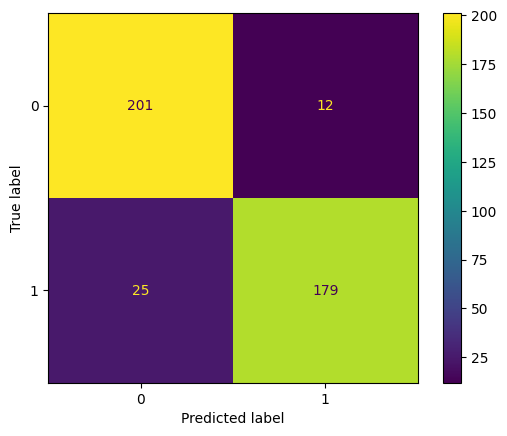

In [ ]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, prediction,labels=rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf1.classes_)
disp.plot(values_format='');

In [ ]:
cmt_rf2 = pd.DataFrame(
    confusion_matrix(y_test, prediction, labels = rf1.classes_),
    index = ['True : NOT purchased', 'True : Purchased'],
    columns = ['Pred : NOT purchased', 'Pred : Purchased'])

cmt_rf2

,Pred : NOT purchased,Pred : Purchased
True : NOT purchased,201,12
True : Purchased,25,179
